In [1]:
%pip install pandas_datareader

In [2]:
%pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf
df = yf.download('AAPL', start = '2010-01-01', end='2019-01-01')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383558,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.278671,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.763050,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.517979,212468400


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383558,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [7]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


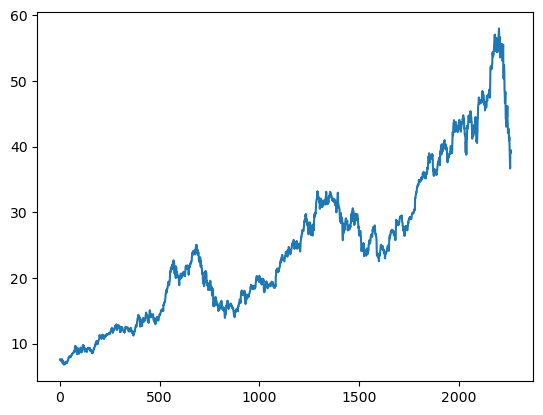

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()

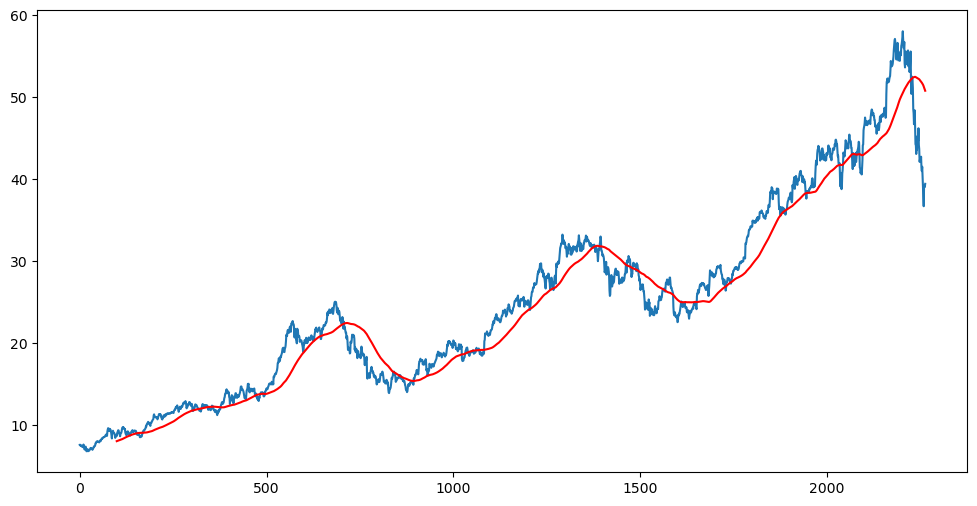

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200 = df.Close.rolling(200).mean()

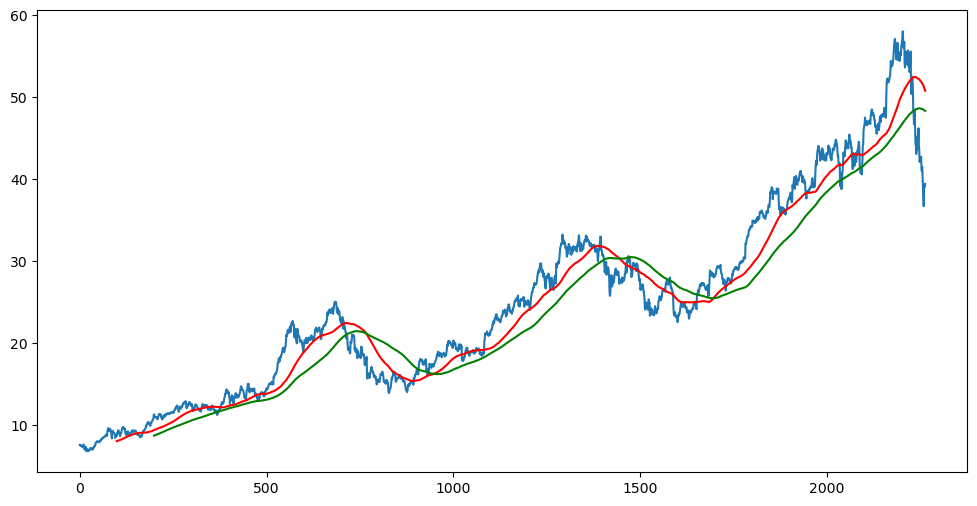

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(2264, 5)

In [14]:
# Splitting the Data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1584, 1)
(680, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
1584,26.782499
1585,26.492500
1586,26.420000
1587,26.270000
1588,26.087500


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)

In [19]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.78070233],
       [0.7582516 ],
       [0.75285205]])

In [20]:
x_train = []
y_train = []

for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1484, 100, 1)

# ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
          
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
          
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
47/47 [==============================] - 28s 298ms/step - loss: 0.0855
Epoch 2/50
47/47 [==============================] - 15s 317ms/step - loss: 0.0149
Epoch 3/50
47/47 [==============================] - 18s 385ms/step - loss: 0.0117
Epoch 4/50
47/47 [==============================] - 18s 379ms/step - loss: 0.0112
Epoch 5/50
47/47 [==============================] - 16s 343ms/step - loss: 0.0119
Epoch 6/50
47/47 [==============================] - 16s 339ms/step - loss: 0.0101
Epoch 7/50
47/47 [==============================] - 23s 483ms/step - loss: 0.0092
Epoch 8/50
47/47 [==============================] - 19s 412ms/step - loss: 0.0086
Epoch 9/50
47/47 [==============================] - 16s 335ms/step - loss: 0.0085
Epoch 10/50
47/47 [==============================] - 15s 318ms/step - loss: 0.0085
Epoch 11/50
47/47 [==============================] - 15s 317ms/step - loss: 0.0083
Epoch 12/50
47/47 [==============================] - 17s 353ms/step - loss: 0.0090
Epoch 13/50
4

In [26]:
model.save('Keras_model.h5')

In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [29]:
final_df.head()

,Close
0,29.719999
1,29.507500
2,29.452499
3,29.575001
4,29.334999


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20136879],
       [0.19537148],
       [0.19381923],
       [0.19727654],
       [0.19050305],
       [0.18302406],
       [0.17540393],
       [0.20242715],
       [0.1971354 ],
       [0.19678265],
       [0.17836735],
       [0.18224794],
       [0.1611515 ],
       [0.15621255],
       [0.14217173],
       [0.14816904],
       [0.13151771],
       [0.11070346],
       [0.11987585],
       [0.11917029],
       [0.1289071 ],
       [0.1248148 ],
       [0.11627744],
       [0.12982431],
       [0.11980528],
       [0.10527062],
       [0.1059056 ],
       [0.08727864],
       [0.07309673],
       [0.04311014],
       [0.04670855],
       [0.05778594],
       [0.06787555],
       [0.04974249],
       [0.06477104],
       [0.047908  ],
       [0.04459188],
       [0.0455091 ],
       [0.04205183],
       [0.07817682],
       [0.06420663],
       [0.06808721],
       [0.02173147],
       [0.02645876],
       [0.04938968],
       [0.04296905],
       [0.02921052],
       [0.042

In [31]:
input_data.shape

(780, 1)

In [32]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [34]:
# Making Prediction

y_predicted = model.predict(x_test)

22/22 [==============================] - 6s 136ms/step


In [35]:
y_predicted.shape


(680, 1)

In [36]:
y_test

array([0.11846468, 0.11028014, 0.10823399, 0.1040006 , 0.09884993,
       0.05277643, 0.03167999, 0.02398928, 0.02328373, 0.03414946,
       0.02716437, 0.02046145, 0.01679253, 0.01728642, 0.02173147,
       0.01531084, 0.        , 0.00127002, 0.02497707, 0.02222537,
       0.02977493, 0.02723489, 0.0344317 , 0.04296905, 0.05334089,
       0.06547665, 0.07105064, 0.07062726, 0.06717   , 0.05729205,
       0.05207087, 0.05348198, 0.0584915 , 0.06131378, 0.06067879,
       0.06568831, 0.05990267, 0.04938968, 0.05023638, 0.04797857,
       0.05087142, 0.03520783, 0.033585  , 0.03930013, 0.03676008,
       0.04064067, 0.02159038, 0.01199467, 0.02293092, 0.02864605,
       0.03711283, 0.03915898, 0.03280887, 0.03661894, 0.03951179,
       0.04473297, 0.04684969, 0.04995415, 0.04607356, 0.05962043,
       0.05954986, 0.06695833, 0.06724057, 0.06787555, 0.06413606,
       0.05870322, 0.04938968, 0.0446624 , 0.08897199, 0.09877936,
       0.09786214, 0.1108446 , 0.0997672 , 0.10901011, 0.10957

In [37]:
y_predicted

array([[0.1868583 ],
       [0.18762669],
       [0.1881743 ],
       [0.18845406],
       [0.18843849],
       [0.18811359],
       [0.18741459],
       [0.18625203],
       [0.18453634],
       [0.1822184 ],
       [0.17923175],
       [0.17566189],
       [0.1716022 ],
       [0.16715378],
       [0.16246413],
       [0.15766363],
       [0.15289746],
       [0.14825395],
       [0.14380513],
       [0.13966635],
       [0.1359422 ],
       [0.13273028],
       [0.130098  ],
       [0.12809369],
       [0.12675664],
       [0.12611635],
       [0.12619427],
       [0.12698759],
       [0.12844922],
       [0.13048403],
       [0.13294545],
       [0.13565832],
       [0.13845074],
       [0.14118268],
       [0.14375669],
       [0.14606506],
       [0.1480976 ],
       [0.14983869],
       [0.15125948],
       [0.15232603],
       [0.15297575],
       [0.15320718],
       [0.15301377],
       [0.1523782 ],
       [0.15134534],
       [0.1499775 ],
       [0.14835846],
       [0.146

In [38]:
factor = scaler.scale_

In [39]:
scale_factor = 1/factor

In [40]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE:", rmse)

# Calculate RMSE percentage
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("RMSE Percentage:", rmse_percentage)

RMSE: 2.4035122217516127
RMSE Percentage: 15.323397485035711


In [1]:
df.info()

NameError: name 'df' is not defined

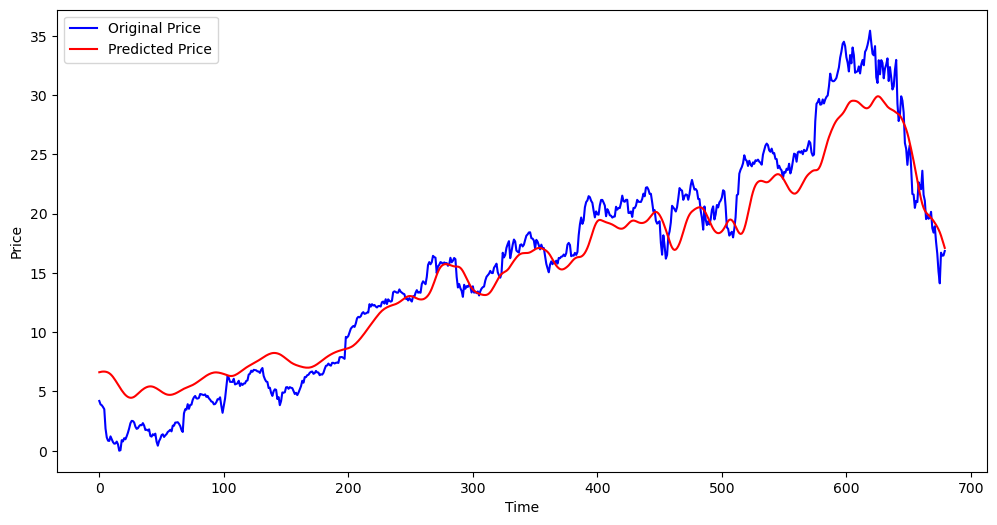

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()